In [67]:
# Importing all the files containing the required data and joining them together to create a new dataframe
import pandas as pd
df1 = pd.read_csv("Sales_April_2019.csv")
df2 = pd.read_csv("Sales_February_2019.csv")
df3 = pd.read_csv("Sales_March_2019.csv")
df4 = pd.read_csv("Sales_May_2019.csv")
df5 = pd.read_csv("Sales_June_2019.csv")
df6 = pd.read_csv("Sales_July_2019.csv")
df7 = pd.read_csv("Sales_August_2019.csv")
df8 = pd.read_csv("Sales_September_2019.csv")
df9 = pd.read_csv("Sales_October_2019.csv")
df10 = pd.read_csv("Sales_November_2019.csv")
df11 = pd.read_csv("Sales_December_2019.csv")
df12 = pd.read_csv("Sales_January_2019.csv")
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12])

CLEANING THE DATA: DROPPIN THE NULL VALUES

In [68]:
# preprocessing data (handling missing values)
new_data = df.dropna(how = "all")

In [69]:
new_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


THERE ARE STRINGS VALUE AT PLACES WHERE THERE SHOULD BE INTEGERS, LET'S CLEAR THAT OUT. THERE WERE SOME ROWS THAT CONTAINED "Order Date" INSTEAD OF A CLEAR DATE. WE GET RID OF THOSE WITH THE FOLLOWING LINE OF CODE

In [70]:
# coloumn headers were repeated multiple times in the data, getting rid of those
new_data = new_data[new_data['Order Date'] != 'Order Date']

THE DATA IS TIME SERIES LET'S CONVERT THE Order Date TO DateTime FORMAT, EXCTRACT THE MONTH AND ADD IT TO THE DATAFRAME

In [71]:
# converting data frame into datetime format for ease of calculations
new_data['Order Date'] = pd.to_datetime(new_data['Order Date'])
new_data['Month'] = new_data['Order Date'].dt.month
new_data.head()

<ipython-input-71-92bdcc6ac58a>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_data['Order Date'] = pd.to_datetime(new_data['Order Date'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


ADDING A SALES COLOUMN TO THE DATAFRAME

In [72]:
# Convert 'Quantity Ordered' and 'Price Each' columns to numeric, handling errors
new_data['Quantity Ordered'] = pd.to_numeric(new_data['Quantity Ordered'])
new_data['Price Each'] = pd.to_numeric(new_data['Price Each'])
# Adding a new coloumn 'Sales' by multiplying quantity and price of each quantity
new_data = new_data.assign(Sales = new_data['Quantity Ordered'] * new_data['Price Each'])
new_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


QUESTION 1: WHAT WAS THE BEST MONTH FOR SALE AND WHAT WAS THE SALES AMOUNT IN THE MONTH?

In [73]:
# grouping the sales by month to answer the question
sales_by_month = new_data.groupby('Month')[['Sales']].sum()
sales_by_month.sort_values('Sales', ascending = False, inplace = True)
sales_by_month.head(12)

,Sales
Month,
12,4613443.34
10,3736726.88
4,3390670.24
11,3199603.20
5,3152606.75
3,2807100.38
7,2647775.76
6,2577802.26
8,2244467.88


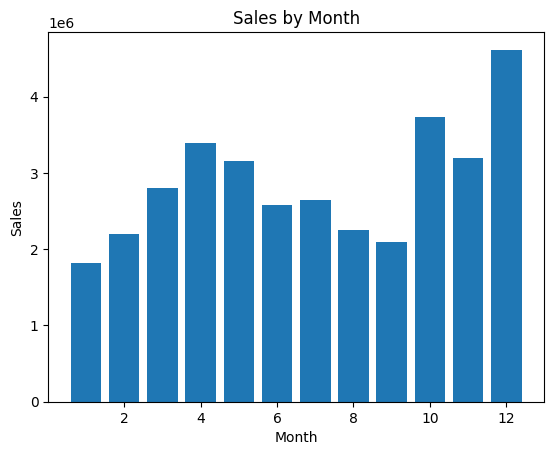

In [74]:
# Plotting the result
import matplotlib.pyplot as plt
plt.bar(sales_by_month.index, sales_by_month['Sales'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales by Month')
plt.show()

FROM THE ABOVE, WE CAN CONCLUDE THAT 12TH MONTH THAT IS DECEMBER IS THE MONTH WITH BEST SALES AT 4.61 MILLION

QUESTION 2: WHICH CITY HAD THE HIGHEST SALE?

In [76]:
# Extracting city by splitting on commas and selecting the second element
new_data['Purchase City'] = new_data['Purchase Address'].str.split(',').str[1].str.strip()
new_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Purchase City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [79]:
# Sales by city and the top 5 cities by sale
sales_by_city = new_data.groupby('Purchase City')[['Sales']].sum()
sales_by_city.sort_values('Sales', ascending = False, inplace = True)
sales_by_city.head()

,Sales
Purchase City,
San Francisco,8262203.91
Los Angeles,5452570.80
New York City,4664317.43
Boston,3661642.01
Atlanta,2795498.58


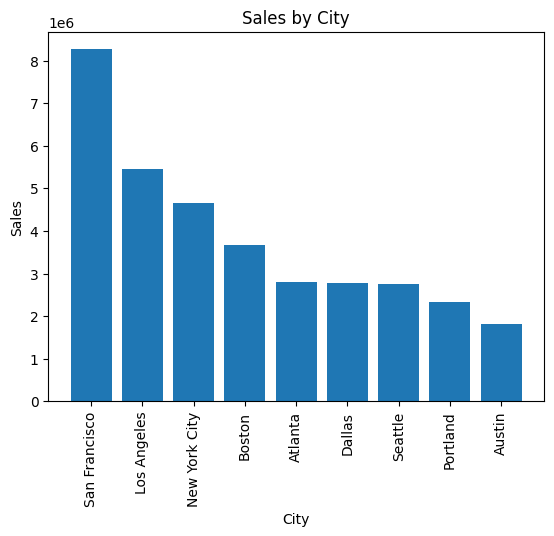

In [90]:
# Plotting the results we get
plt.bar(sales_by_city.index,sales_by_city['Sales'])
xticks = plt.xticks(rotation = 90)
plt.xlabel('City')
plt.ylabel('Sales')
plt.title('Sales by City')
plt.show()

WE CAN CONCLUDE THAT SAN FRANCISCO IS THE CITY WITH HIGHEST SALES AT 8.26 MILLION

QUESTION 3: WHAT TIME TO ADVERTISE TO MAXIMISE SALES?

In [93]:
# Extracting hour from the order date
new_data['Hour'] = new_data['Order Date'].dt.hour
new_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Purchase City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


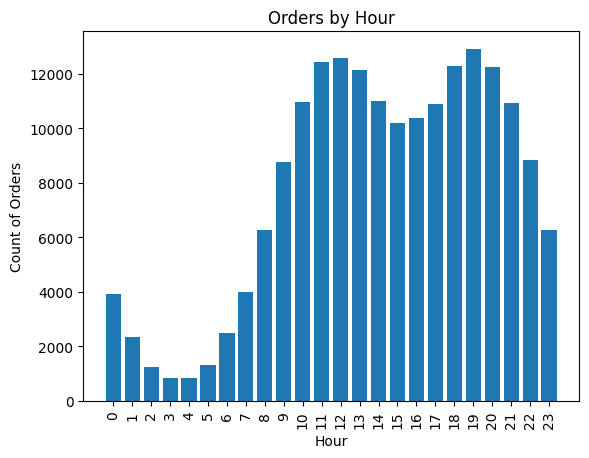

In [104]:
#sorting the values based on the hour
adv = new_data.groupby('Hour')[['Order ID']].count()
adv.sort_values('Order ID', ascending = False, inplace = True)
adv.head()
#plotting the values/results
plt.bar(adv.index, adv['Order ID'])
plt.xticks(adv.index, adv.index, rotation='vertical')
plt.xlabel('Hour')
plt.ylabel('Count of Orders')
plt.title('Orders by Hour')
plt.show()

THE BEST HOURS TO ADVESRTISE WOULD BE THE TIME WHEN MORE AND MORE BUYERS ARE BUYING THE ITEMS, WHICH BY THE ABOVE WOULD BEW BETWEEN 10AM TO 1PM AND 6PM TO 8PM.

QUESTION 4: WHAT PRODUCTS ARE OFTEN SOLD TOGETHER?

(LOGIC: TWO ITEMS SOLD TOGETHER WILL HAVE THE SAME ORDER NO.)

In [106]:
# trying to count find the different groups of products
tog = new_data[new_data['Order ID'].duplicated(keep = False)]
tog['Grouped'] = tog.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
tog = tog[['Order ID', 'Grouped']].drop_duplicates()
tog.head()

<ipython-input-106-4a305d1bc658>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tog['Grouped'] = tog.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [107]:
# count the pairs of what occurs most frequently
from itertools import combinations
from collections import Counter

count = Counter()
for row in tog['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


THE ABOVE CODE SUGGESTS THAT AN iPHONE AND A Lightning Charging Cable ARE THE TWO ITEMS MOST FREQUENTLY BOUGHT TOGETHER.

QUESTION 5: WHAT PRODUCT IS SOLD THE MOST?

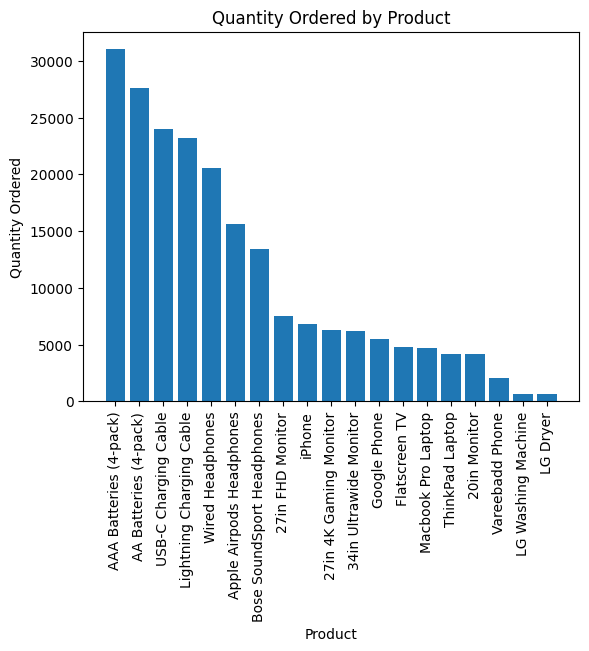

In [110]:
# grouping the data by products and aggregating the quantity ordered to answe the question
new_data = new_data.groupby('Product')[['Quantity Ordered']].sum()
new_data.sort_values('Quantity Ordered', ascending = False, inplace = True)
new_data.head()

#plotting the results
plt.bar(new_data.index, new_data['Quantity Ordered'])
xticks = plt.xticks(rotation = 90)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Quantity Ordered by Product')
plt.show()

THE ABOVE OBSERVATION CLEARLY SUGGESTS THAT AAA Batteries(4-Pack) IS THE MOST BOUGHT ITEM.